In [1]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd
from cloudy_fit_lib import *
from scipy.interpolate import RegularGridInterpolator
import pickle
import corner
from scipy import integrate, interpolate
import emcee

In [2]:
plt.style.use('/Users/thepoetoftwilight/Documents/CUBS/Code/science.mplstyle')

In [3]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/cloudy_grids/'

In [4]:
savedir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z=0.67545705/cloudy_fits/'

Species names

In [5]:
ion_list = ['HI', 'HeI', 'CII', 'CIII', 'CIV', 'NII', 'NIII', 'NIV', 'NV',
            'OII', 'OIII', 'OIV', 'OV', 'OVI', 'SiII', 'SiIII', 'SiIV',
            'MgII', 'MgX', 'NeV', 'NeVI', 'NeVIII', 'SIV', 'SV', 'SVI']

Specify density/metallicity grid

In [6]:
log_metals_arr = [-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,-1.0 ,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0]
log_hdens_arr = [-4.8,-4.4,-4.2,-4.0,-3.8,-3.6,-3.4,-3.2,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6]
logT_arr = np.arange(4.00, 6.01, 0.01)

Load grids

In [7]:
pkl_file = open(rootdir+'TDP_grid.pkl', 'rb')
logX_dict_TDP_samples = pickle.load(pkl_file)
pkl_file.close()

Set up the 3D grid across metallicity, density, and temperature

In [8]:
logX_dict_TDP_interp = {}

for ion in ion_list:
    logX_dict_TDP_interp[ion] = RegularGridInterpolator((log_metals_arr, log_hdens_arr, logT_arr), 
                                                     logX_dict_TDP_samples[ion])

# Make diagnostics

In [9]:
logN_dict = {#'HI':'15.52, -0.05, +0.05',
            #'CII':'<13.5',
            #'CIII': '13.98, -0.05, +0.05', # '>13.9',
            #'CIV':'13.68, -0.05, +0.05',
            #'NII':'<13.2',
            #'NIII':'<13.4',
            #'NV':'<14.0',
            #'OII':'<13.3',
            'OIII':'14.43, -0.02, +0.02',
            'OIV':'15.01, -0.05, +0.07', # '>14.9',
            'OVI':'14.29, -0.03, +0.03',}
            #'NeVIII':'<13.4',
            #'MgII':'<11.4',
            #'AlIII':'<12.5',
            #'SiII':'<13.3',
            #'SiIII':'<13.0',
            #'SVI':'<13.0',
            #'FeII':'<11.8'}

In [11]:
gen_logN_ratio_str(logN_dict['OIV'], logN_dict['OIII'])

'0.58, -0.05, 0.07'

In [12]:
logN_ratio_dict = {'OIV/OIII': '0.58, -0.05, 0.07',
                   'OVI/OIV': '-0.72, -0.06, 0.08'
                  }

## OIII, OIV, OVI

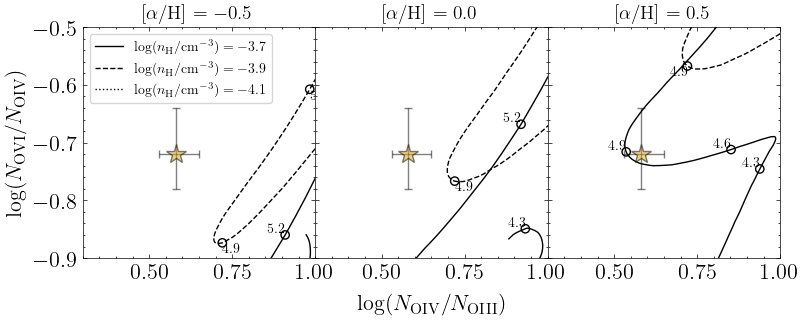

In [165]:
fig, axes = plt.subplots(1,3,figsize=(3*3,3), sharex=True, sharey=True)

# Plot measurements

scat_logN_ratio(axes[0], 'OIV/OIII', 'OVI/OIV', logN_ratio_dict)
axes[0].set_title(r'$\mathrm{[\alpha/H]}=-0.5$', fontsize=14)

scat_logN_ratio(axes[1], 'OIV/OIII', 'OVI/OIV', logN_ratio_dict)
axes[1].set_title(r'$\mathrm{[\alpha/H]}=0.0$', fontsize=14)

scat_logN_ratio(axes[2], 'OIV/OIII', 'OVI/OIV', logN_ratio_dict)
axes[2].set_title(r'$\mathrm{[\alpha/H]}=0.5$', fontsize=14)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$\log(N_\mathrm{OIV}/N_\mathrm{OIII})$', labelpad=25)
ax_label.set_ylabel(r'$\log(N_\mathrm{OVI}/N_\mathrm{OIV})$', labelpad=40)

plt.subplots_adjust(wspace=0, hspace=0.0)

# Plot tracks
# metals = -0.5

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      -0.5, -3.7, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      -0.5, -3.9, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      -0.5, -4.1, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      ':', 'left', 'top')

axes[0].legend(fontsize=10)

# metals = -0.3

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.0, -3.7, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.0, -3.9, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.0, -4.1, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      ':', 'left', 'top')

# metals = 0.0

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.5, -3.7, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.5, -3.9, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '--', 'right', 'top')

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.5, -4.1, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      ':', 'left', 'top')

plt.savefig(savedir+'z_068_diagnostic.pdf', dpi=300)
plt.savefig(savedir+'z_068_diagnostic.png', dpi=300)

# Fit column densities - two-phase PIE + TDP

Load PIE grid, obtain the UVB grid from FG20

In [18]:
fg20_z_grid, fg20_wav_grid, fg20_J_nu_grid = read_uvb('', 'fg20_galaxy.ascii')

Fetch the SED at $z=1$

In [19]:
z_test = 1

In [20]:
fg20_J_nu_test = fetch_sed(z_test, fg20_z_grid, fg20_J_nu_grid)

Specify $N_{\mathrm{HI}}$ grid points and get corresponding filenames

In [21]:
logN_HI_min = 12
logN_HI_max = 17
logN_HI_step = 0.25

logN_HI_arr = np.arange(logN_HI_min, logN_HI_max+logN_HI_step, logN_HI_step)

In [22]:
file_list = create_grid_file_list(logN_HI_arr)

Specify grid points for densities and metallicities

In [23]:
log_hdens_min = -5
log_hdens_max = 1
log_hdens_step = 0.25

log_hdens_arr = np.arange(log_hdens_min, log_hdens_max+log_hdens_step, log_hdens_step)
logU_arr = np.log10(calc_U(fg20_wav_grid, fg20_J_nu_test, 10**log_hdens_arr))

In [24]:
log_metals_min = -3
log_metals_max = 1
log_metals_step = 0.25

log_metals_arr = np.arange(log_metals_min, log_metals_max+log_metals_step, log_metals_step)

Load the final grid

In [25]:
pkl_file = open(rootdir+'final_grid.pkl', 'rb')
species_logN_samples = pickle.load(pkl_file)
pkl_file.close()

Interpolate this grid

In [26]:
species_logN_interp = {}

for s in list(species_logN_samples.keys()):
    
    species_logN_samples[s][species_logN_samples[s]==-np.inf] = -99
    
    species_logN_interp[s] = RegularGridInterpolator((logN_HI_arr, log_hdens_arr, log_metals_arr), 
                                                     species_logN_samples[s])

Dictionary of column densities

In [62]:
logN_dict = {'HI':'15.52, -0.05, +0.05',
            'CII':'<13.5',
            'CIII':'13.98, -0.05, +0.05',
            'CIV':'13.68, -0.05, +0.05',
            'NII':'<13.2',
            'NIII':'<13.4',
            'NV':'<14.0',
            'OII':'<13.3',
            'OIII':'14.43, -0.02, +0.02',
            'OIV':'15.01, -0.05, +0.07',
            'OVI':'14.29, -0.03, +0.03',
            'NeVIII':'<13.4',
            'MgII':'<11.4',
            #'AlIII':'<12.5',
            'SiII':'<13.3',
            'SiIII':'<13.0',
            'SVI':'<13.0',}
            #'FeII':'<11.8'}

Test a solution

In [72]:
# Dense PIE phase
logN_HI_test = 15.52
log_hdens_test_p1 = -3.1
log_metals_test_p1 = -0.9
C_O_test_p1 = -0.3
N_O_test_p1 = -0.5

logN_test_p1 = np.array(predict_col_dens(logN_dict, 
                                                 logN_HI_test, 
                                                 log_hdens_test_p1, 
                                                 log_metals_test_p1, 
                                                 species_logN_interp,
                                                 {'C': C_O_test_p1, 'N': N_O_test_p1}))

# Diffuse TDP phase
log_metals_test_p2 = -0.2
log_hdens_test_p2 = -4.0
logT_test_p2 = 4.9
C_O_test_p2 = -2.0
N_O_test_p2 = -2.0
logN_HI_test_p2 = 14.0

logN_test_p2 = predict_col_dens_model_TDP(logN_dict,log_metals_test_p2,log_hdens_test_p2,logT_test_p2,logN_HI_test_p2,logX_dict_TDP_interp,C_O_test_p2,N_O_test_p2)

Total column density yield

In [73]:
logN_test = np.log10(10**logN_test_p1 + 10**logN_test_p2)

Make a test plot

(12.0, 16.0)

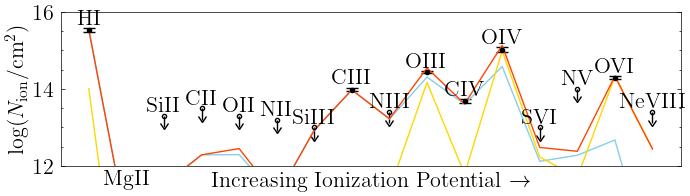

In [74]:
fig, ax = plt.subplots(1, figsize=(8,2))

plot_column_densities_obs(logN_dict, fig, ax)
ax.plot(np.arange(len(logN_dict)), logN_test_p1, color='skyblue')
ax.plot(np.arange(len(logN_dict)), logN_test_p2, color='gold')
ax.plot(np.arange(len(logN_dict)), logN_test, color='orangered')

ax.set_ylim(12,16)

Attempt to fit

In [75]:
log_metals_arr = [-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,-1.0 ,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0]
log_hdens_arr = [-4.8,-4.4,-4.2,-4.0,-3.8,-3.6,-3.4,-3.2,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6]
logT_arr = np.arange(4.00, 6.01, 0.01)

In [166]:
def log_prior_mix(log_metals_p1, log_hdens_p1, C_O_p1, N_O_p1,
                log_metals_p2, log_hdens_p2, logT_p2, C_O_p2, N_O_p2, logN_HI_p2, species_logN_interp, logX_dict_TDP_interp):
        
    logN_HI_obs = logN_HI_test
    
    if log_metals_arr[0]<log_metals_p1<log_metals_arr[-1] and log_metals_arr[0]<log_metals_p2<log_metals_arr[-1]:
        if -3<log_metals_p1+C_O_p1<1 and C_O_p1 < 1.5 and -3<log_metals_p2+C_O_p2<1 and -3<log_metals_p1+N_O_p1<1 and -3<log_metals_p2+N_O_p2<1:
            if log_hdens_arr[0]<log_hdens_p1<log_hdens_arr[-1] and log_hdens_arr[0]<log_hdens_p2<log_hdens_arr[-1]:
                if 4.0<logT_p2<6.0: # Temperature limits based on HI/CIV linewidth
                    if 12.0<logN_HI_p2<logN_HI_obs:
                        if log_hdens_p1>log_hdens_p2: # CIV denser and colder
                            
                            # PIE cloud size
                            logl_p1 = np.log10(get_cloud_size(logN_HI_obs, log_hdens_p1, species_logN_interp, log_metals_p1))
                            # TDP cloud size
                            logl_p2 = get_logl_TDP(log_metals_p2, log_hdens_p2, logT_p2, logN_HI_p2, logX_dict_TDP_interp)
                            
                            # Limits for diffuse cloud size
                            logl_p2_S = np.log10(0.03*(10**log_hdens_p2/1e-3)**-1) # in kpc
                            logl_p2_J = np.log10(40*(10**log_hdens_p2/1e-3)**-0.5*(10**logT_p2/1e4)**0.5) # added scaling for temperature
                            
                            if logl_p1<logl_p2 and logl_p2_S<logl_p2<logl_p2_J:
                                
                                # OIII yield
                                logN_OIII_p1 = species_logN_interp['O+2']([logN_HI_obs, log_hdens_p1, log_metals_p1])[0]
                                logN_OIII_p2 = predict_col_dens_TDP('OIII', log_metals_p2, log_hdens_p2, logT_p2, logN_HI_p2, logX_dict_TDP_interp)
                                
                                if logN_OIII_p1 > logN_OIII_p2:
                                    return np.log(10**logN_HI_p2) # log10 to linear, then natural log
                                else:
                                    return -np.inf
                            else:
                                return -np.inf
                        else:
                            return -np.inf
                    else:
                        return -np.inf
                else:
                    return -np.inf
            else:
                return -np.inf
        else:
            return -np.inf
    else:
        return -np.inf

In [167]:
def log_likelihood_mix(log_metals_p1, log_hdens_p1, C_O_p1, N_O_p1,
                     log_metals_p2, log_hdens_p2, logT_p2, C_O_p2, N_O_p2, logN_HI_p2,
                     logN_dict, species_logN_interp, logX_dict_TDP_interp):
    
    logN_HI_obs = logN_HI_test # Measured N(HI) to generate column densities
    
    ll = 0
    
    for ion in list(logN_dict.keys()):
        
        # Model side: prediction adjusted for elemental abundance
        s = ion_species_dict[ion] # Species, for PIE
        
        # PIE prediction
        if ion != 'HI':
            y_bar_p1 = species_logN_interp[s]([logN_HI_obs, log_hdens_p1, log_metals_p1])[0]
        else:
            y_bar_p1 = logN_HI_obs
        
        # TDP prediction
        elem = ion_species_dict[ion].split('+')[0] # Element, for TDP
        y_bar_p2 = predict_col_dens_TDP(ion, log_metals_p2, log_hdens_p2, logT_p2, logN_HI_p2, logX_dict_TDP_interp)
        
        # Account for non-solar abundance pattern
        if elem == 'C': 
            y_bar_p1 += C_O_p1
            y_bar_p2 += C_O_p2
            
        if elem == 'N':
            y_bar_p1 += N_O_p1
            y_bar_p2 += N_O_p2
          
        y_bar = np.log10(10**y_bar_p1 + 10**y_bar_p2)
            
        # Data side: handle upper limits, lower limits, and measurements separately
        logN_str = logN_dict[ion]
        
        ll += compute_ll(logN_str, y_bar)

    return ll

In [168]:
def log_probability_mix(params, logN_dict, species_logN_interp, logX_dict_TDP_interp):
    
    log_metals_p1,log_hdens_p1,C_O_p1,N_O_p1,log_metals_p2,log_hdens_p2,logT_p2,C_O_p2,N_O_p2,logN_HI_p2 = params
    
    lp = log_prior_mix(log_metals_p1,log_hdens_p1,C_O_p1,N_O_p1,log_metals_p2,log_hdens_p2,logT_p2,C_O_p2,N_O_p2,logN_HI_p2,species_logN_interp,logX_dict_TDP_interp)
    
    if not np.isfinite(lp):
        return -np.inf
    return lp+log_likelihood_mix(log_metals_p1,log_hdens_p1,C_O_p1,N_O_p1,log_metals_p2,log_hdens_p2,logT_p2,C_O_p2,N_O_p2,logN_HI_p2,logN_dict,species_logN_interp,logX_dict_TDP_interp)

MCMC fit

In [169]:
pos = np.array([log_metals_test_p1,log_hdens_test_p1,C_O_test_p1,N_O_test_p1, 
                log_metals_test_p2,log_hdens_test_p2,logT_test_p2,C_O_test_p2,N_O_test_p2,logN_HI_test_p2]) + 1e-4 * np.random.randn(200, 10)
nwalkers, ndim = pos.shape

In [170]:
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_mix, args=(logN_dict,species_logN_interp,logX_dict_TDP_interp)
)

In [174]:
#sampler.run_mcmc(pos, 1000, progress=True);

In [176]:
#flat_samples_mix = pd.DataFrame(sampler.get_chain(discard=100, flat=True), 
#                                columns=['log_metals_p1','log_hdens_p1','C_O_p1','N_O_p1',
#                                         'log_metals_p2','log_hdens_p2','logT_p2','C_O_p2','N_O_p2','logN_HI_p2'])
#flat_samples_mix.to_csv(savedir+'PIE+TDP.csv', index=False)

flat_samples_mix = pd.read_csv(savedir+'PIE+TDP.csv')

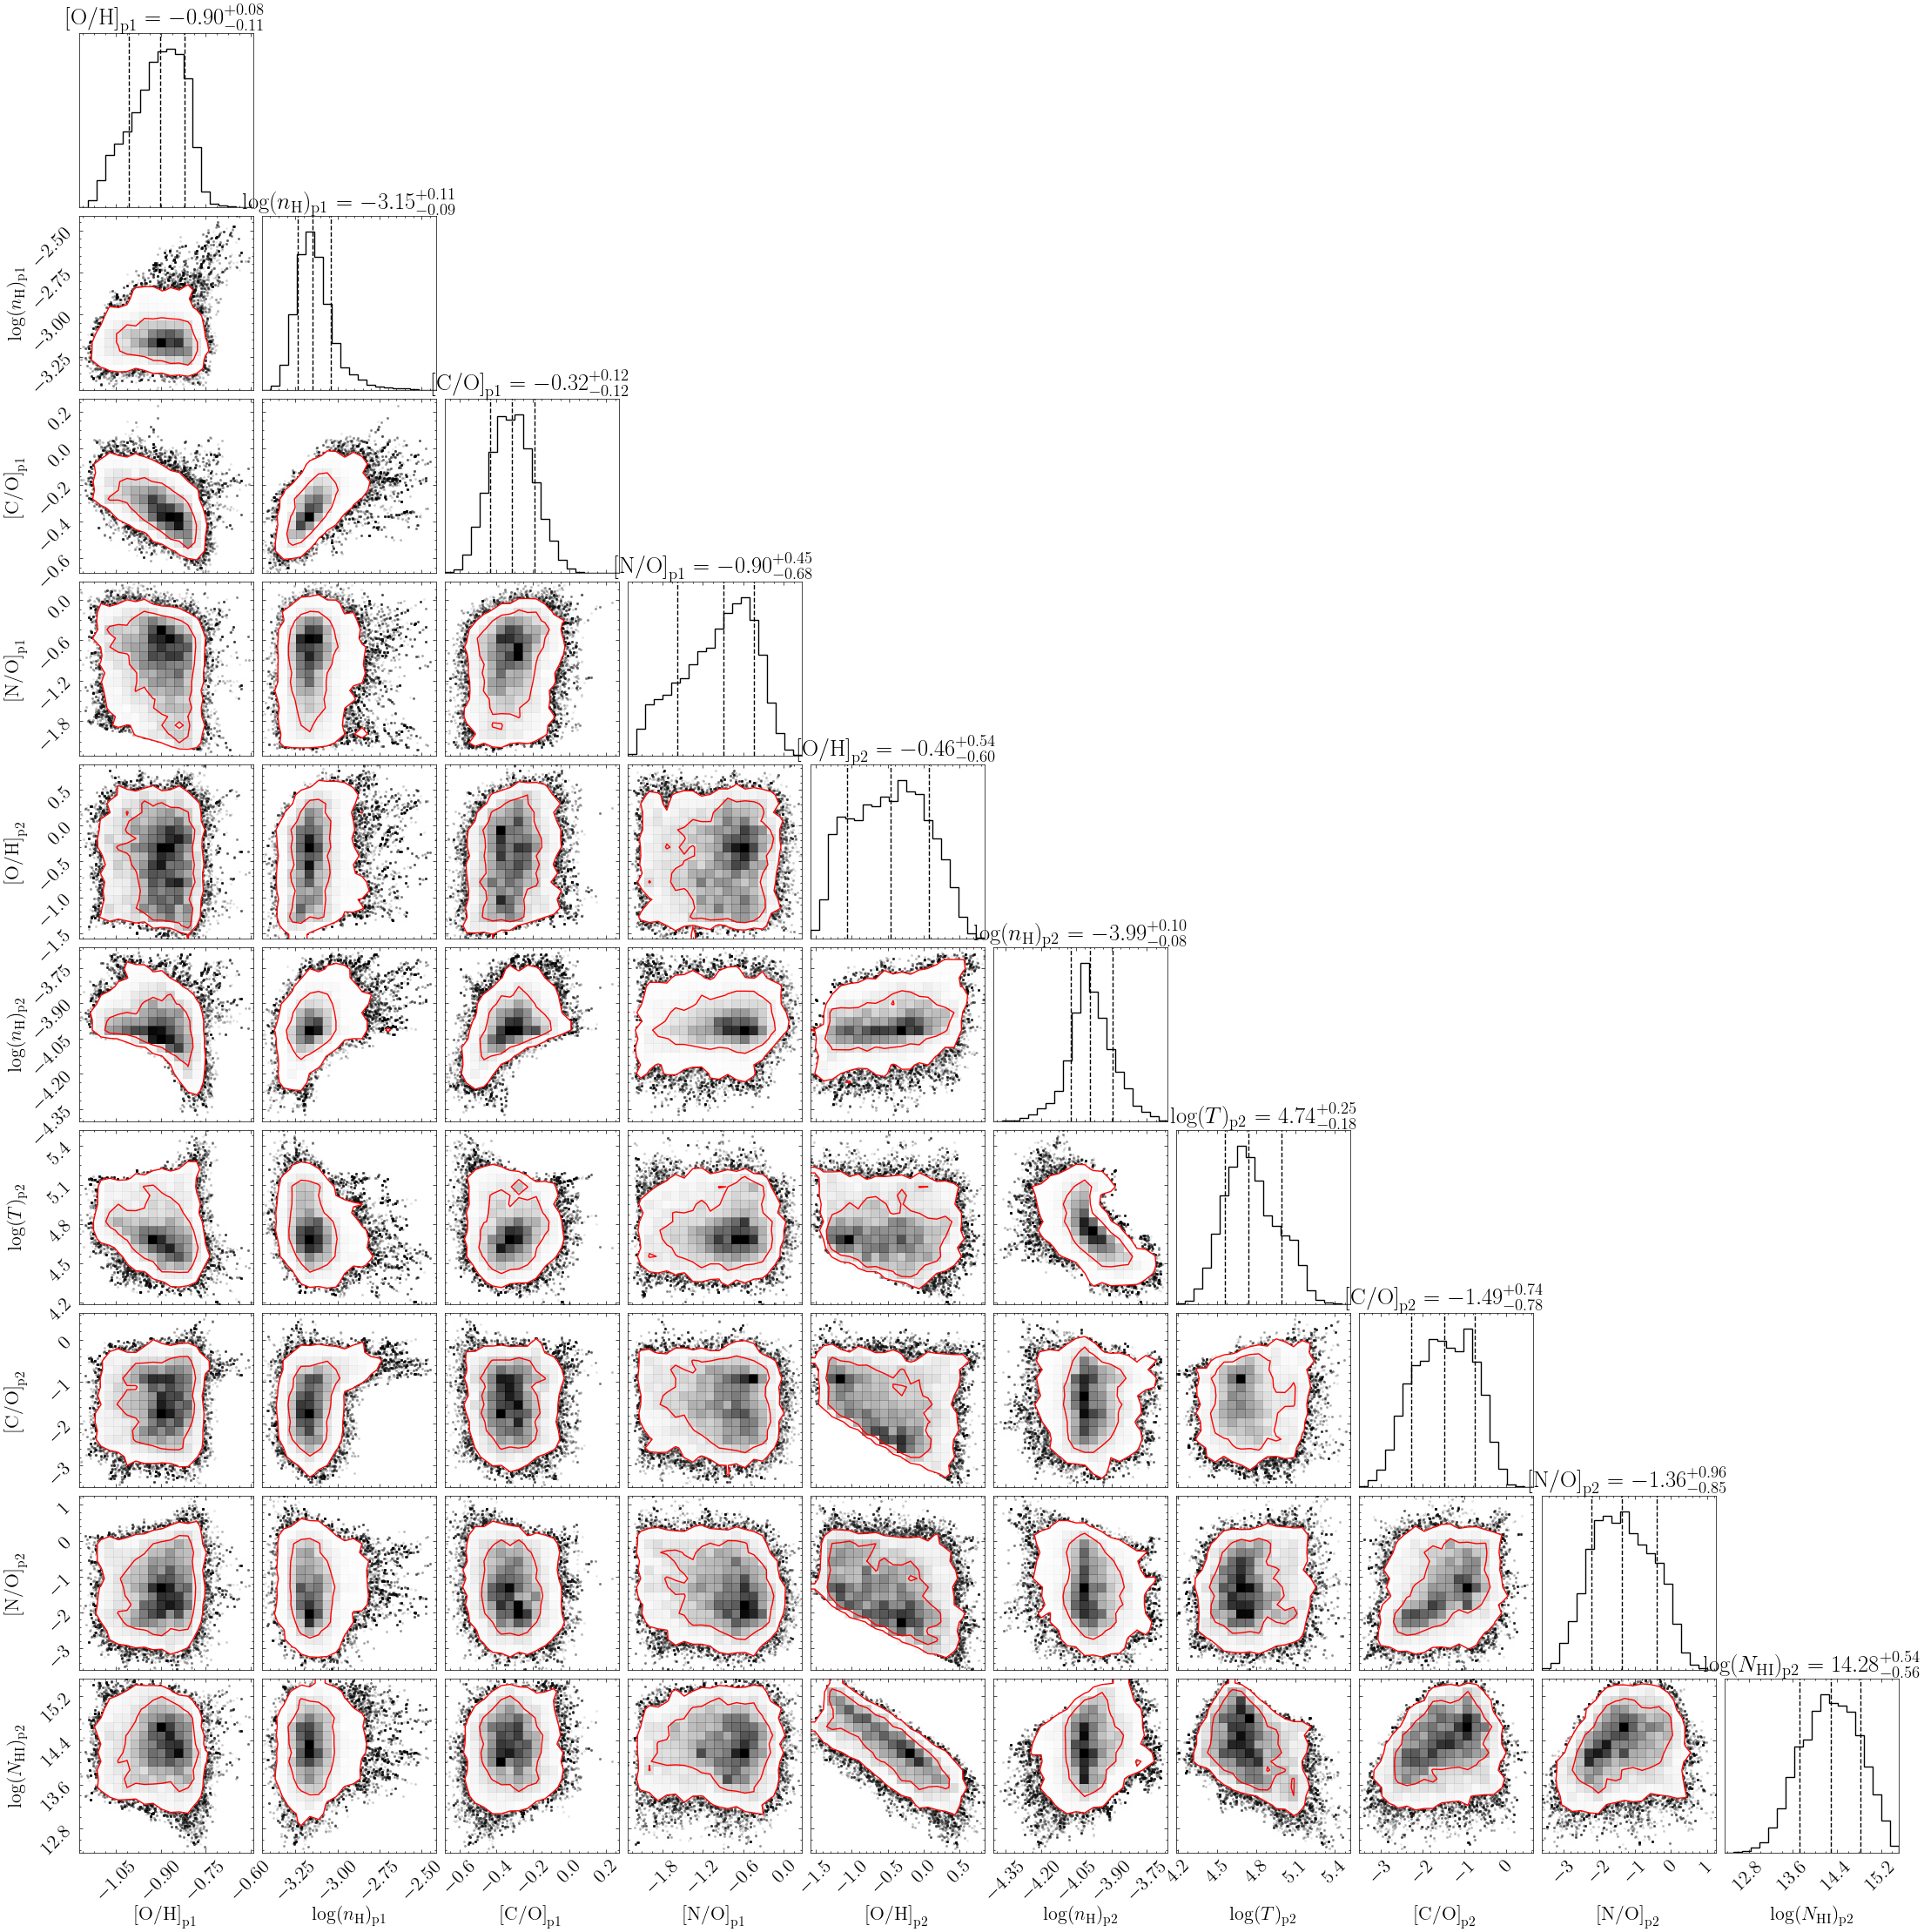

In [177]:
fig = corner.corner(
    flat_samples_mix, quantiles = [0.16, 0.5, 0.84], show_titles=True, 
    labels=[r'$\mathrm{[O/H]}_\mathrm{p1}$',r'$\log(n_\mathrm{H})_\mathrm{p1}$',r'$\mathrm{[C/O]}_\mathrm{p1}$',r'$\mathrm{[N/O]}_\mathrm{p1}$',
            r'$\mathrm{[O/H]}_\mathrm{p2}$',r'$\log(n_\mathrm{H})_\mathrm{p2}$',r'$\log(T)_\mathrm{p2}$',r'$\mathrm{[C/O]}_\mathrm{p2}$',r'$\mathrm{[N/O]}_\mathrm{p2}$',
            r'$\log(N_\mathrm{HI})_\mathrm{p2}$'], 
    plot_density=True, levels=[0.68, 0.95], contour_kwargs={'colors':'red'}
);

In [178]:
np.median(flat_samples_mix['log_hdens_p1'])

-3.1502421114284704

In [107]:
np.percentile(flat_samples_mix['N_O_p1'], 100*cdf_3sig)

0.0976194300080497

In [109]:
np.percentile(flat_samples_mix['logN_HI_p2'], 100*(1-cdf_3sig)), np.percentile(flat_samples_mix['logN_HI_p2'], 100*cdf_3sig)

(12.827865852530092, 15.081011749036534)

In [108]:
np.percentile(flat_samples_mix['log_metals_p2'], 100*(1-cdf_3sig)), np.percentile(flat_samples_mix['log_metals_p2'], 100*cdf_3sig)

(-1.6088063974433928, 0.6530920473306798)

In [111]:
np.percentile(flat_samples_mix['C_O_p2'], 100*cdf_3sig), np.percentile(flat_samples_mix['N_O_p2'], 100*cdf_3sig)

(0.3232928660863796, 0.7893265563464689)

Make plot

In [112]:
logN_dict = {#'HI':'15.52, -0.05, +0.05',
            #'CII':'<13.5',
            'CIII':'13.98, -0.05, +0.05',
            'CIV':'13.68, -0.05, +0.05',
            #'NII':'<13.2',
            'NIII':'<13.4',
            'NV':'<14.0',
            'OII':'<13.3',
            'OIII':'14.43, -0.02, +0.02',
            'OIV':'15.01, -0.05, +0.07',
            'OVI':'14.29, -0.03, +0.03',
            'NeVIII':'<13.4',
            #'MgII':'<11.4',
            #'AlIII':'<12.5',
            #'SiII':'<13.3',
            'SiIII':'<13.0',
            'SVI':'<13.0',}
            #'FeII':'<11.8'}

In [113]:
b_dict =  {'HI': '36, -1, +2',
        'CIII': '31, -2, +2',
        'CIV': '33, -4, +5',
        'OIII': '34, -2, +2',
        'OIV': '30, -2, +2',
        'OVI': '32, -3, +3'}

In [114]:
# Best-fit model prediction

logN_species_p1_best = predict_col_dens(logN_dict, logN_HI_test, np.median(flat_samples_mix['log_hdens_p1']), 
                                        np.median(flat_samples_mix['log_metals_p1']), 
                                        species_logN_interp, {'C':np.median(flat_samples_mix['C_O_p1']), 
                                                              'N':np.median(flat_samples_mix['N_O_p1'])})
logN_species_p2_best = predict_col_dens_model_TDP(logN_dict,
                                               np.median(flat_samples_mix['log_metals_p2']),
                                               np.median(flat_samples_mix['log_hdens_p2']),
                                               np.median(flat_samples_mix['logT_p2']),
                                               np.median(flat_samples_mix['logN_HI_p2']),
                                               logX_dict_TDP_interp,
                                               np.median(flat_samples_mix['C_O_p2']),
                                               np.median(flat_samples_mix['N_O_p2']))

logN_species_best = np.log10(10**logN_species_p1_best + 10**logN_species_p2_best)

In [115]:
logN_res_dict = get_logN_residuals(logN_dict, logN_species_best)

In [145]:
logN_res_up = {k:'<0.4' for k in list(logN_res_dict.keys())}

logN_res_up['OII'] = '<0.18'
logN_res_up['NIII'] = '<0.18'
logN_res_up['SVI'] = '<0.18'
logN_res_up['NV'] = '<0.18'
logN_res_up['NeVIII'] = '<0.18'

In [146]:
# Model curves for each step
logN_species_p1_grid = predict_col_dens(logN_dict, logN_HI_test, flat_samples_mix['log_hdens_p1'], 
                                        flat_samples_mix['log_metals_p1'], 
                                        species_logN_interp, 
                                        {'C':flat_samples_mix['C_O_p1'], 'N':flat_samples_mix['N_O_p1']})

logN_species_p2_grid = np.zeros(logN_species_p1_grid.shape)

ctr = 0

for i in range(len(ion_species_dict)):
    
    ion = list(ion_species_dict.keys())[i]
    
    if ion in list(logN_dict.keys()):
        s = ion_species_dict[ion] # Species, for PIE
        elem = ion_species_dict[ion].split('+')[0] # Element, for non-solar abundances
        
        logN_species_p2_grid[ctr,:] = predict_col_dens_TDP(ion, 
                                           flat_samples_mix['log_metals_p2'],
                                           flat_samples_mix['log_hdens_p2'],
                                           flat_samples_mix['logT_p2'],
                                           flat_samples_mix['logN_HI_p2'],
                                           logX_dict_TDP_interp)
        
        if elem == 'C':
            logN_species_p2_grid[ctr,:] += flat_samples_mix['C_O_p2']
            
        if elem == 'N':
            logN_species_p2_grid[ctr,:] += flat_samples_mix['N_O_p2']
            
        ctr += 1

logN_species_grid = np.log10(10**logN_species_p1_grid + 10**logN_species_p2_grid)

In [147]:
# Draws within 1-sigma of well-constrained values

filtered = []

log_hdens_p1_lo = np.percentile(flat_samples_mix['log_hdens_p1'], 100*(1-cdf_1sig))
log_hdens_p1_hi = np.percentile(flat_samples_mix['log_hdens_p1'], 100*cdf_1sig)

log_metals_p1_lo = np.percentile(flat_samples_mix['log_metals_p1'], 100*(1-cdf_1sig))
log_metals_p1_hi = np.percentile(flat_samples_mix['log_metals_p1'], 100*cdf_1sig)

C_O_p1_lo = np.percentile(flat_samples_mix['C_O_p1'], 100*(1-cdf_1sig))
C_O_p1_hi = np.percentile(flat_samples_mix['C_O_p1'], 100*cdf_1sig)

N_O_p1_lo = np.percentile(flat_samples_mix['N_O_p1'], 100*(1-cdf_1sig))
N_O_p1_hi = np.percentile(flat_samples_mix['N_O_p1'], 100*cdf_1sig)

log_hdens_p2_lo = np.percentile(flat_samples_mix['log_hdens_p2'], 100*(1-cdf_1sig))
log_hdens_p2_hi = np.percentile(flat_samples_mix['log_hdens_p2'], 100*cdf_1sig)

for i in range(len(flat_samples_mix)):
    log_hdens_p1 = flat_samples_mix['log_hdens_p1'][i]
    log_metals_p1 = flat_samples_mix['log_metals_p1'][i]
    C_O_p1 = flat_samples_mix['C_O_p1'][i]
    N_O_p1 = flat_samples_mix['N_O_p1'][i]
    log_hdens_p2 = flat_samples_mix['log_hdens_p2'][i]
    
    if log_hdens_p1_lo<log_hdens_p1<log_hdens_p1_hi and log_metals_p1_lo<log_metals_p1<log_metals_p1_hi and C_O_p1_lo<C_O_p1<C_O_p1_hi and N_O_p1_lo<N_O_p1<N_O_p1_hi and log_hdens_p2_lo<log_hdens_p2<log_hdens_p2_hi:
        filtered.append(i)
        
plot_idx = np.random.randint(0, len(filtered), 50)

In [148]:
import matplotlib.lines as mlines

In [149]:
z_sys = 0.67545705

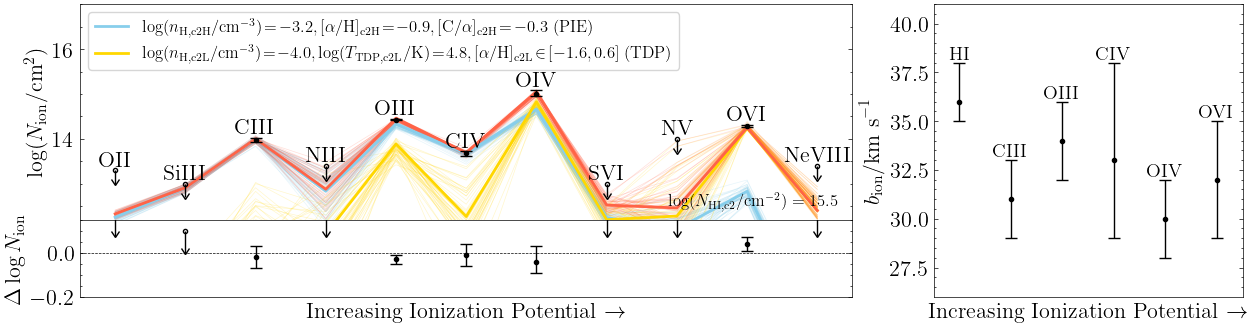

In [163]:
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                               figsize=(15,3.8), gridspec_kw={'height_ratios': [2.8,1], 'width_ratios': [2.5, 1]})

for idx in plot_idx:
    axd['upper left'].plot(np.arange(len(logN_dict)), logN_species_p1_grid[:,filtered[idx]], color='skyblue', lw=.5, alpha=.2)
    axd['upper left'].plot(np.arange(len(logN_dict)), logN_species_p2_grid[:,filtered[idx]], color='gold', lw=.5, alpha=.2)
    axd['upper left'].plot(np.arange(len(logN_dict)), logN_species_grid[:,filtered[idx]], color='tomato', lw=.5, alpha=.2)
    
axd['upper left'].plot(np.arange(len(logN_dict)), logN_species_p1_best, color='skyblue', lw=2)
axd['upper left'].plot(np.arange(len(logN_dict)), logN_species_p2_best, color='gold', lw=2)
axd['upper left'].plot(np.arange(len(logN_dict)), logN_species_best, color='tomato', lw=2)


plot_column_densities_obs(logN_dict, fig, axd['upper left'])

axd['upper left'].set_ylim(12.2,17.)

handles = []

handles.append(mlines.Line2D([], [], lw=2,
                             color='skyblue', 
                             marker='None',
              linestyle='-', markersize=8, 
              label=r'$\log(n_\mathrm{H, c2H}/\mathrm{cm}^{-3}) \!=\! -3.2, \mathrm{[\alpha/H]_{c2H}}\!=\!-0.9, \mathrm{[C/\alpha]_{c2H}}\!=\!-0.3$ (PIE)'))

handles.append(mlines.Line2D([], [], lw=2,
                             color='gold', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H, c2L}/\mathrm{cm}^{-3})\!=\!-4.0, \log(T_\mathrm{TDP,c2L}/\mathrm{K})\!=\!4.8, \mathrm{[\alpha/H]_{c2L}}\!\in\![-1.6,0.6]$ (TDP)'))
    
axd['upper left'].text(len(logN_dict)-.7, 12.5, r'$\log(N_\mathrm{HI, c2}/\mathrm{cm}^{-2}) = 15.5$', fontsize=12,
            horizontalalignment='right')

axd['upper left'].legend(handles=handles, loc='upper left', fontsize=12, ncol=1)

plot_column_densities_obs(logN_res_dict, fig, axd['lower left'], label_ions=False, dy=.08, c_dy=1.3)
plot_column_densities_obs(logN_res_up, fig, axd['lower left'], label_ions=False, dy=.08, c_dy=1.3)

axd['lower left'].set_ylim(-.2,.15)
axd['lower left'].axhline(0, linestyle='--', lw=.5)
axd['lower left'].set_ylabel(r'$\Delta \log N_\mathrm{ion}$')

plot_linewidth_obs(b_dict, fig, axd['right'], fs=14)
axd['right'].set_xlim(-0.5, len(b_dict)-1+0.5)
axd['right'].set_ylim(26,41)

plt.subplots_adjust(wspace=0.15, hspace=0) 

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_PIE+TDP.pdf'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)
plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_PIE+TDP.png'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)

In [151]:
logl_p1 = np.log10(get_cloud_size(logN_HI_test, flat_samples_mix['log_hdens_p1'], species_logN_interp, 
                                  flat_samples_mix['log_metals_p1'])) # PIE
logl_p2 = get_logl_TDP(flat_samples_mix['log_metals_p2'], flat_samples_mix['log_hdens_p2'], 
                       flat_samples_mix['logT_p2'], flat_samples_mix['logN_HI_p2'], logX_dict_TDP_interp) # TDP

Text(0.5, 0, '$\\log(l_\\mathrm{p1}/\\mathrm{kpc})$')

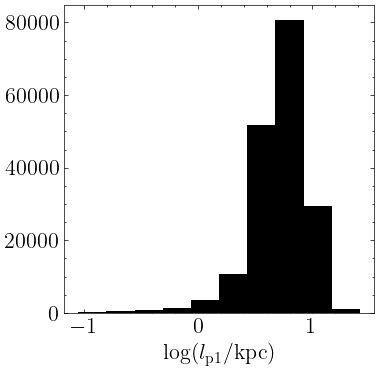

In [152]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.hist(logl_p1)
ax.set_xlabel(r'$\log(l_\mathrm{p1}/\mathrm{kpc})$')

In [118]:
get_quantiles(logl_p1)

0.74 -0.22 0.19


(array([  185.,  1405.,  8940., 26160., 33973., 35465., 30814., 25467.,
        14655.,  2936.]),
 array([-0.02166524,  0.27375102,  0.56916729,  0.86458356,  1.15999983,
         1.4554161 ,  1.75083236,  2.04624863,  2.3416649 ,  2.63708117,
         2.93249744]),
 <BarContainer object of 10 artists>)

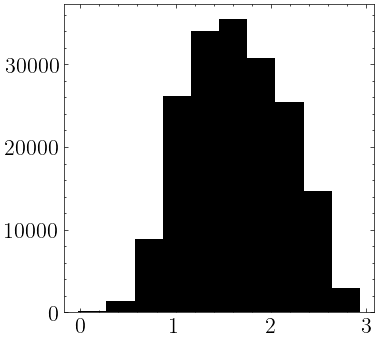

In [119]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.hist(logl_p2)

In [120]:
get_quantiles(logl_p2)

1.61 -0.53 0.59


In [121]:
np.percentile(logl_p2, 100*(1-cdf_3sig)), np.percentile(logl_p2, 100*cdf_3sig)

(0.29373168880123757, 2.8427271510525216)

# DRAFT

## HI

Text(0, 0.5, '$\\log(N_\\mathrm{HI}/\\mathrm{cm}^{-2})$')

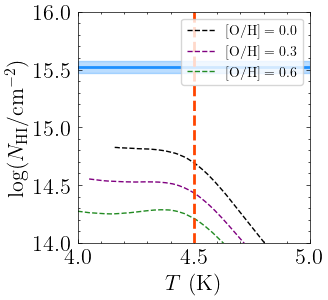

In [14]:
fig, ax = plt.subplots(1, figsize=(3,3))

logT_filt, logN_HI_filt = get_logN_HI('OIII', 14.43, 0, -3.5, logT_arr, logX_dict_TDP_interp)
ax.plot(logT_filt, logN_HI_filt,color='black', linestyle='--', label=r'$\mathrm{[O/H]}=0.0$')

logT_filt, logN_HI_filt = get_logN_HI('OIII', 14.43, 0.3, -3.5, logT_arr, logX_dict_TDP_interp)
ax.plot(logT_filt, logN_HI_filt,color='purple', linestyle='--', label=r'$\mathrm{[O/H]}=0.3$')

logT_filt, logN_HI_filt = get_logN_HI('OIII', 14.43, 0.6, -3.5, logT_arr, logX_dict_TDP_interp)
ax.plot(logT_filt, logN_HI_filt,color='forestgreen', linestyle='--', label=r'$\mathrm{[O/H]}=0.6$')

ax.axhline(15.52, color='dodgerblue', lw=2)
ax.axhspan(15.47,15.57, color='dodgerblue',alpha=.3)
ax.axvline(4.5, color='orangered', lw=2, linestyle='--')

ax.set_xlim(4.0, 5.0)
ax.set_ylim(14, 16)

ax.legend(fontsize=10, loc='upper right')
ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\log(N_\mathrm{HI}/\mathrm{cm}^{-2})$')

# Fit column densities - oxygen only

In [15]:
def log_prior_1(log_metals, log_hdens, logT, logN_HI):
    
    if log_metals_arr[0]<log_metals<log_metals_arr[-1]:
        if log_hdens_arr[0]<log_hdens<log_hdens_arr[-1]:
            if logT_arr[0]<logT<logT_arr[-1]:
                
                # measured HI - use as upper limit
                logN_HI_obs = 15.52
                
                if 12.0<logN_HI<logN_HI_obs: # Underpredict HI
                    return np.log(10**log_hdens) + np.log(10**logT) + np.log(10**logN_HI)
                else:
                    return -np.inf
            else:
                return -np.inf
        else:
            return -np.inf
    else:
        return -np.inf

In [16]:
def log_likelihood_1(log_metals, log_hdens, logT, logN_HI, logN_dict, logX_dict_TDP_interp):
        
    ll = 0
    
    for ion in list(logN_dict.keys()):
        
        y_bar = predict_col_dens_TDP(ion, log_metals, log_hdens, logT, logN_HI, logX_dict_TDP_interp)
        logN_str = logN_dict[ion]
        
        ll += compute_ll(logN_str, y_bar)

    # Compute chi-square
    return ll

In [17]:
def log_probability_1(params, logN_dict, logX_dict_TDP_interp):
    
    log_metals, log_hdens, logT, logN_HI = params
    
    lp = log_prior_1(log_metals,log_hdens,logT,logN_HI)
    
    if not np.isfinite(lp):
        return -np.inf
    return lp+log_likelihood_1(log_metals,log_hdens,logT,logN_HI,logN_dict,logX_dict_TDP_interp)

In [18]:
logN_dict = {#'HI':'15.52, -0.05, +0.05',
            #'CII':'<13.5',
            #'CIII':'13.98, -0.05, +0.05',
            #'CIV':'13.68, -0.05, +0.05',
            #'NII':'<13.2',
            #'NIII':'<13.4',
            #'NV':'<13.8',
            'OII':'<13.3',
            'OIII':'14.43, -0.02, +0.02',
            'OIV':'15.01, -0.05, +0.07',
            'OVI':'14.29, -0.03, +0.03',}
            #'NeVIII':'<13.4',
            #'MgII':'<11.4',
            #'AlIII':'<12.5',
            #'SiII':'<13.3',
            #'SiIII':'<12.9',
            #'SVI':'<12.8',}
            #'FeII':'<11.8'}

In [19]:
log_metals_test = 0.4
log_hdens_test = -3.7
logT_test = 5.1
logN_HI_test = 13.5

logN_test = predict_col_dens_model_TDP(logN_dict,log_metals_test,log_hdens_test,logT_test,logN_HI_test,logX_dict_TDP_interp)

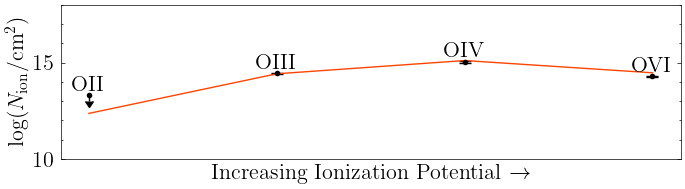

In [20]:
fig, ax = plt.subplots(1, figsize=(8,2))

plot_column_densities_obs(logN_dict, fig, ax,
                          gray_out = ['CII', 'CIII', 'CIV'])

ax.plot(np.arange(len(logN_dict)), logN_test, color='orangered')

In [21]:
pos = np.array([log_metals_test, log_hdens_test, logT_test, logN_HI_test]) + 1e-4 * np.random.randn(200, 4)
nwalkers, ndim = pos.shape

In [22]:
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_1, args=(logN_dict,logX_dict_TDP_interp)
)

In [23]:
#sampler.run_mcmc(pos, 500, progress=True);

In [24]:
#flat_samples_1 = pd.DataFrame(sampler.get_chain(discard=100, flat=True), 
#                                columns=['log_metals', 'log_hdens', 'logT', 'logN_HI'])
#flat_samples_1.to_csv(savedir+'TDP_1.csv', index=False)

flat_samples_1 = pd.read_csv(savedir+'TDP_1.csv')

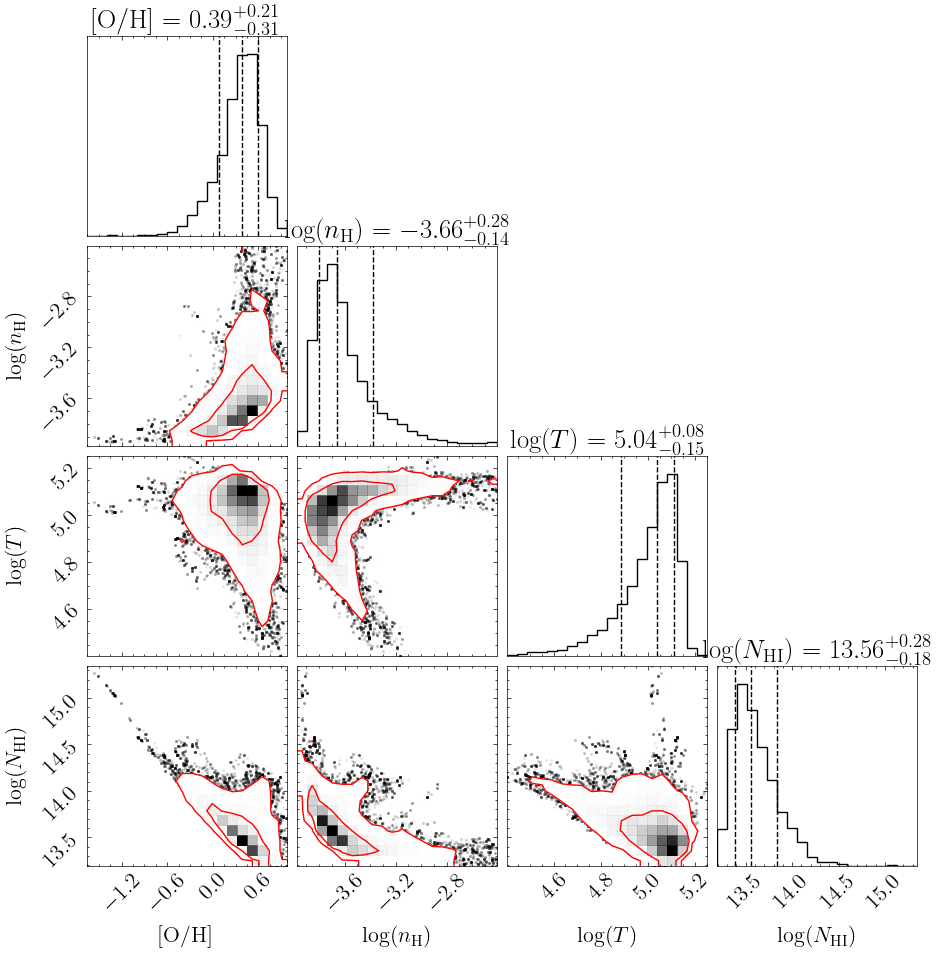

In [25]:
fig = corner.corner(
    flat_samples_1, quantiles = [0.16, 0.5, 0.84], show_titles=True, 
    labels=[r'$\mathrm{[O/H]}$', r'$\log(n_\mathrm{H})$', r'$\log(T)$', r'$\log(N_\mathrm{HI})$'], 
    plot_density=True, levels=[0.68, 0.95], contour_kwargs={'colors':'red'}
);

Make a plot

In [26]:
logN_dict = {#'HI':'15.52, -0.05, +0.05',
            'CII':'<13.5',
            'CIII':'13.98, -0.05, +0.05',
            'CIV':'13.68, -0.05, +0.05',
            #'NII':'<13.2',
            #'NIII':'<13.4',
            #'NV':'<13.8',
            'OII':'<13.3',
            'OIII':'14.43, -0.02, +0.02',
            'OIV':'15.01, -0.05, +0.07',
            'OVI':'14.29, -0.03, +0.03',}
            #'NeVIII':'<13.4',
            #'MgII':'<11.4',
            #'AlIII':'<12.5',
            #'SiII':'<13.3',
            #'SiIII':'<12.9',
            #'SVI':'<12.8',}
            #'FeII':'<11.8'}

In [27]:
p1_grid = np.array(flat_samples_1)

yb_med = np.zeros(len(logN_dict))
yb_lo = np.zeros(len(logN_dict))
yb_hi = np.zeros(len(logN_dict))

ctr = 0

for i in range(len(ion_species_dict)):
    
    ion = list(ion_species_dict.keys())[i]

    if ion in list(logN_dict.keys()):
        
        y_samples = predict_col_dens_TDP(ion,p1_grid[:,0],p1_grid[:,1],p1_grid[:,2],p1_grid[:,3],logX_dict_TDP_interp)

        yb_med[ctr] = np.median(y_samples)
        yb_lo[ctr] = np.percentile(y_samples, 16)
        yb_hi[ctr] = np.percentile(y_samples, 84)
        
        ctr += 1

(12.8, 15.7)

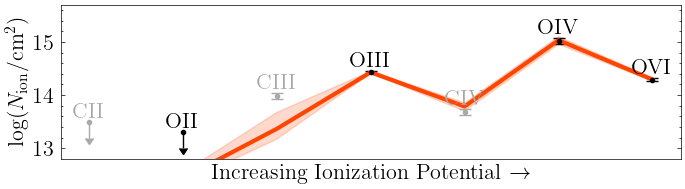

In [28]:
fig, ax = plt.subplots(1, figsize=(8,2))

plot_column_densities_obs(logN_dict, fig, ax,
                          gray_out = ['CII', 'CIII', 'CIV'])

ax.plot(np.arange(len(logN_dict)), yb_med, lw=3, color='orangered')
ax.fill_between(np.arange(len(logN_dict)), yb_lo, yb_hi, color='orangered', alpha=.2)

ax.set_ylim(12.8,15.7)

# Fit column densities - HI+CIII

In [29]:
def log_prior_2(log_metals, log_hdens, logT, C_O):
    
    if log_metals_arr[0]<log_metals<log_metals_arr[-1] and -3<log_metals+C_O<1: #[C/H]
        if log_hdens_arr[0]<log_hdens<log_hdens_arr[-1]:
            if 4.0<logT<4.8: # Temperature limits based on HI linewidth
                return np.log(10**log_hdens) + np.log(10**logT)
            else:
                return -np.inf
        else:
            return -np.inf
    else:
        return -np.inf

In [30]:
def log_likelihood_2(log_metals, log_hdens, logT, C_O, logN_dict, logX_dict_TDP_interp):
    
    logN_HI_obs = 15.52 # Measured N(HI) to generate column densities
    
    ll = 0
    
    for ion in list(logN_dict.keys()):
        
        # Model side: prediction adjusted for elemental abundance
        elem = ion_species_dict[ion].split('+')[0]
        
        y_bar = predict_col_dens_TDP(ion, log_metals, log_hdens, logT, logN_HI_obs, logX_dict_TDP_interp)
        if elem == 'C':
            y_bar += C_O 
            
        # Data side: handle upper limits, lower limits, and measurements separately
        logN_str = logN_dict[ion]
        
        ll += compute_ll(logN_str, y_bar)

    return ll

In [31]:
def log_probability_2(params, logN_dict, logX_dict_TDP_interp):
    
    log_metals, log_hdens, logT, C_O = params
    
    lp = log_prior_2(log_metals,log_hdens,logT,C_O)
    
    if not np.isfinite(lp):
        return -np.inf
    return lp+log_likelihood_2(log_metals,log_hdens,logT,C_O,logN_dict,logX_dict_TDP_interp)

In [32]:
logN_dict = {#'HI':'15.52, -0.05, +0.05',
            'CII':'<13.5',
            'CIII':'13.98, -0.05, +0.05',
            'CIV':'<13.68',
            #'NII':'<13.2',
            #'NIII':'<13.4',
            #'NV':'<13.8',
            'OII':'<13.3',
            'OIII':'<14.43',
            'OIV':'<15.01',
            'OVI':'<14.29',
            #'NeVIII':'<13.4',
            'MgII':'<11.4',
            #'AlIII':'<12.5',
            'SiII':'<13.3',}
            #'SiIII':'<12.9',
            #'SVI':'<12.8',}
            #'FeII':'<11.8'}

In [33]:
log_metals_test = -1.0
log_hdens_test = -3.4
logT_test = 4.5
C_O_test = -0.4
logN_HI_test = 15.52

logN_test = predict_col_dens_model_TDP(logN_dict,log_metals_test,log_hdens_test,logT_test,logN_HI_test,logX_dict_TDP_interp, C_O_test)

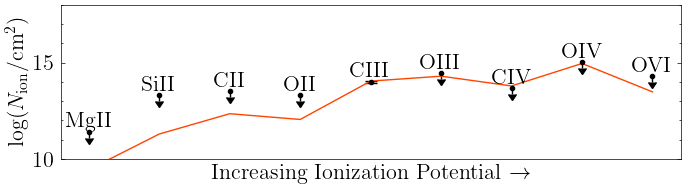

In [34]:
fig, ax = plt.subplots(1, figsize=(8,2))

plot_column_densities_obs(logN_dict, fig, ax)

ax.plot(np.arange(len(logN_dict)), logN_test, color='orangered')

In [35]:
pos = np.array([log_metals_test, log_hdens_test, logT_test, C_O_test]) + 1e-4 * np.random.randn(200, 4)
nwalkers, ndim = pos.shape

In [36]:
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_2, args=(logN_dict,logX_dict_TDP_interp)
)

In [37]:
#sampler.run_mcmc(pos, 500, progress=True);

In [38]:
#flat_samples_2 = pd.DataFrame(sampler.get_chain(discard=100, flat=True), 
#                                columns=['log_metals', 'log_hdens', 'logT', 'C_O'])
#flat_samples_2.to_csv(savedir+'TDP_2.csv', index=False)

flat_samples_2 = pd.read_csv(savedir+'TDP_2.csv')

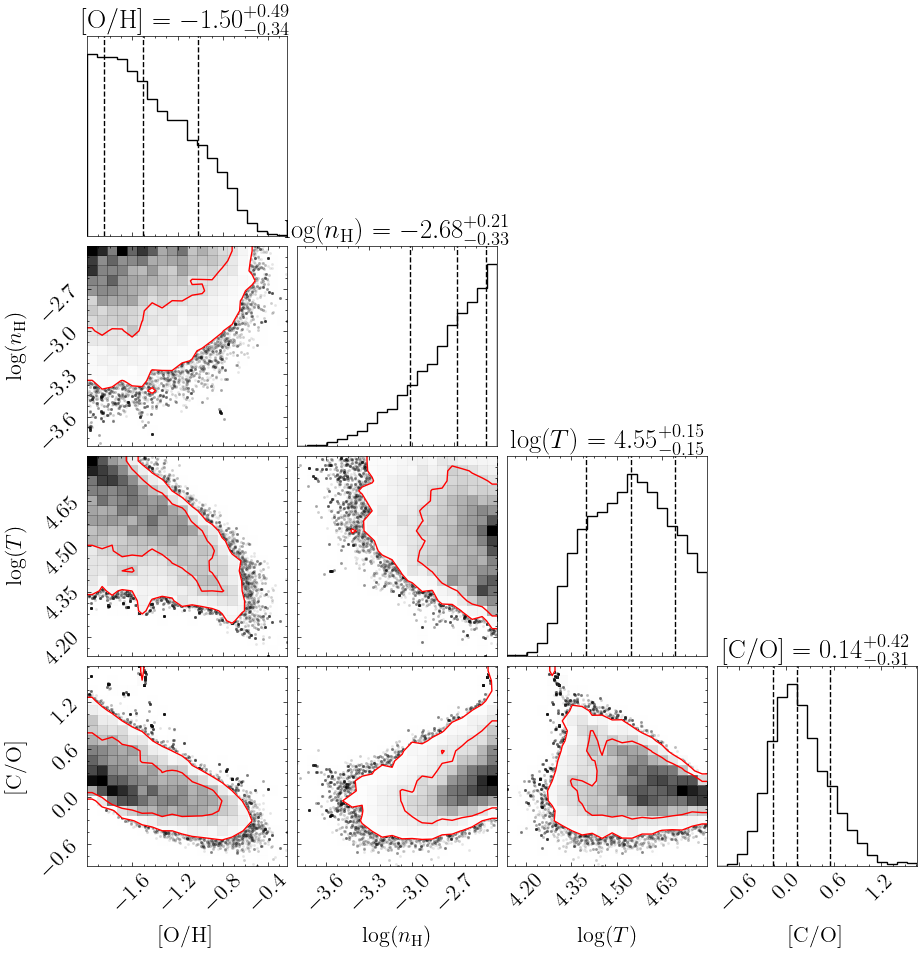

In [39]:
fig = corner.corner(
    flat_samples_2, quantiles = [0.16, 0.5, 0.84], show_titles=True, 
    labels=[r'$\mathrm{[O/H]}$', r'$\log(n_\mathrm{H})$', r'$\log(T)$', r'$\mathrm{[C/O]}$'], 
    plot_density=True, levels=[0.68, 0.95], contour_kwargs={'colors':'red'}
);

Make a plot

In [40]:
logN_dict = {#'HI':'15.52, -0.05, +0.05',
            'CII':'<13.5',
            'CIII':'13.98, -0.05, +0.05',
            'CIV':'13.68, -0.05, +0.05',
            #'NII':'<13.2',
            #'NIII':'<13.4',
            #'NV':'<13.8',
            'OII':'<13.3',
            'OIII':'14.43, -0.02, +0.02',
            'OIV':'15.01, -0.05, +0.07',
            'OVI':'14.29, -0.03, +0.03',
            #'NeVIII':'<13.4',
            'MgII':'<11.4',
            #'AlIII':'<12.5',
            'SiII':'<13.3',
            'SiIII':'<12.9',}
            #'SVI':'<12.8',}
            #'FeII':'<11.8'}

In [41]:
p2_grid = np.array(flat_samples_2)

yb_med = np.zeros(len(logN_dict))
yb_lo = np.zeros(len(logN_dict))
yb_hi = np.zeros(len(logN_dict))

ctr = 0

for i in range(len(ion_species_dict)):
    
    ion = list(ion_species_dict.keys())[i]
    elem = ion_species_dict[ion].split('+')[0]
    
    if ion in list(logN_dict.keys()):
        
        y_samples = predict_col_dens_TDP(ion, p2_grid[:,0], p2_grid[:,1], p2_grid[:,2], 15.52, logX_dict_TDP_interp)
        if elem == 'C':
            y_samples += p2_grid[:,3]

        yb_med[ctr] = np.median(y_samples)
        yb_lo[ctr] = np.percentile(y_samples, 16)
        yb_hi[ctr] = np.percentile(y_samples, 84)
        
        ctr += 1

(10.8, 15.9)

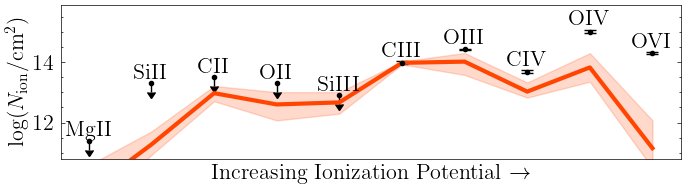

In [42]:
fig, ax = plt.subplots(1, figsize=(8,2))

plot_column_densities_obs(logN_dict, fig, ax)

ax.plot(np.arange(len(logN_dict)), yb_med, lw=3, color='orangered')
ax.fill_between(np.arange(len(logN_dict)), yb_lo, yb_hi, color='orangered', alpha=.2)

ax.set_ylim(10.8,15.9)

# Fit column densities - two-phase fit

In [9]:
def log_prior_3(log_metals_p1, log_hdens_p1, logT_p1, C_O_p1, N_O_p1, 
                log_metals_p2, log_hdens_p2, logT_p2, C_O_p2, N_O_p2, logN_HI_p2, logX_dict_TDP_interp):
        
    logN_HI_obs = 15.52
    
    if log_metals_arr[0]<log_metals_p1<log_metals_arr[-1] and log_metals_arr[0]<log_metals_p2<log_metals_arr[-1]:
        if -3<log_metals_p1+C_O_p1<1 and -3<log_metals_p1+N_O_p1<1 and -3<log_metals_p2+C_O_p2<1 and -3<log_metals_p2+N_O_p2<1:
            if log_hdens_arr[0]<log_hdens_p1<log_hdens_arr[-1] and log_hdens_arr[0]<log_hdens_p2<log_hdens_arr[-1]:
                if 4.0<logT_p1<4.8 and 4.0<logT_p2<6.0: # Temperature limits based on HI/CIII linewidth
                    if 12.0<logN_HI_p2<logN_HI_obs:
                        if log_hdens_p1>log_hdens_p2 and logT_p1<logT_p2: # CIII denser and colder
                            logl_p1 = get_logl_TDP(log_metals_p1, log_hdens_p1, logT_p1, logN_HI_obs, logX_dict_TDP_interp)
                            logl_p2 = get_logl_TDP(log_metals_p2, log_hdens_p2, logT_p2, logN_HI_p2, logX_dict_TDP_interp)
                            if logl_p1 < logl_p2 < 2.:

                                logN_OII_p1 = predict_col_dens_TDP('OII',log_metals_p1,log_hdens_p1,logT_p1,logN_HI_obs,logX_dict_TDP_interp)
                                logN_OII_p2 = predict_col_dens_TDP('OII',log_metals_p2,log_hdens_p2,logT_p2,logN_HI_p2,logX_dict_TDP_interp)

                                logN_CIV_p1 = predict_col_dens_TDP('CIV',log_metals_p1,log_hdens_p1,logT_p1,logN_HI_obs,logX_dict_TDP_interp)+C_O_p1
                                logN_CIV_p2 = predict_col_dens_TDP('CIV',log_metals_p2,log_hdens_p2,logT_p2,logN_HI_p2,logX_dict_TDP_interp)+C_O_p2

                                if logN_OII_p1 > logN_OII_p2 and logN_CIV_p1<logN_CIV_p2:
                                    return np.log(10**log_hdens_p1) + np.log(10**logT_p1) + np.log(10**log_hdens_p2) + np.log(10**logT_p2) + np.log(10**logN_HI_p2)
                                else:
                                    return -np.inf
                            else:
                                return -np.inf
                        else:
                            return -np.inf
                    else:
                        return -np.inf
                else:
                    return -np.inf
            else:
                return -np.inf
        else:
            return -np.inf
    else:
        return -np.inf

In [10]:
def log_likelihood_3(log_metals_p1, log_hdens_p1, logT_p1, C_O_p1, N_O_p1,
                     log_metals_p2, log_hdens_p2, logT_p2, C_O_p2, N_O_p2, logN_HI_p2,
                     logN_dict, logX_dict_TDP_interp):
    
    logN_HI_obs = 15.52 # Measured N(HI) to generate column densities
    
    ll = 0
    
    for ion in list(logN_dict.keys()):
        
        # Model side: prediction adjusted for elemental abundance
        elem = ion_species_dict[ion].split('+')[0]
        
        y_bar_p1 = predict_col_dens_TDP(ion, log_metals_p1, log_hdens_p1, logT_p1, logN_HI_obs, logX_dict_TDP_interp)
        y_bar_p2 = predict_col_dens_TDP(ion, log_metals_p2, log_hdens_p2, logT_p2, logN_HI_p2, logX_dict_TDP_interp)
        
        if elem == 'C': 
            y_bar_p1 += C_O_p1
            y_bar_p2 += C_O_p2
            
        if elem == 'N': 
            y_bar_p1 += N_O_p1
            y_bar_p2 += N_O_p2
          
        y_bar = np.log10(10**y_bar_p1 + 10**y_bar_p2)
            
        # Data side: handle upper limits, lower limits, and measurements separately
        logN_str = logN_dict[ion]
        
        ll += compute_ll(logN_str, y_bar)

    return ll

In [11]:
def log_probability_3(params, logN_dict, logX_dict_TDP_interp):

    log_metals_p1, log_hdens_p1, logT_p1, C_O_p1, N_O_p1, log_metals_p2, log_hdens_p2, logT_p2, C_O_p2, N_O_p2, logN_HI_p2 = params
    
    lp = log_prior_3(log_metals_p1,log_hdens_p1,logT_p1,C_O_p1,N_O_p1,log_metals_p2,log_hdens_p2,logT_p2,C_O_p2,N_O_p2,logN_HI_p2,logX_dict_TDP_interp)
    
    if not np.isfinite(lp):
        return -np.inf
    return lp+log_likelihood_3(log_metals_p1,log_hdens_p1,logT_p1,C_O_p1,N_O_p1,log_metals_p2,log_hdens_p2,logT_p2,C_O_p2,N_O_p2,logN_HI_p2,logN_dict,logX_dict_TDP_interp)

In [12]:
logN_dict = {#'HI':'15.52, -0.05, +0.05',
            'CII':'<13.5',
            'CIII':'13.98, -0.05, +0.05',
            'CIV':'13.68, -0.05, +0.05',
            'NII':'<13.2',
            'NIII':'<13.4',
            'NV':'<13.8',
            'OII':'<13.3',
            'OIII':'14.43, -0.02, +0.02',
            'OIV':'15.01, -0.05, +0.07',
            'OVI':'14.29, -0.03, +0.03',
            #'NeVIII':'<13.4',
            'MgII':'<11.4',
            #'AlIII':'<12.5',
            'SiII':'<13.3',
            'SiIII':'<12.9',
            'SVI':'<12.8',}
            #'FeII':'<11.8'}

In [13]:
log_metals_test_p1 = -1.1
log_hdens_test_p1 = -3.1
logT_test_p1 = 4.5
C_O_test_p1 = -0.3
N_O_test_p1 = -1.5
logN_HI_test_p1 = 15.52

logN_test_p1 = predict_col_dens_model_TDP(logN_dict,log_metals_test_p1,log_hdens_test_p1,logT_test_p1,logN_HI_test_p1,logX_dict_TDP_interp,C_O_test_p1,N_O_test_p1)

log_metals_test_p2 = -0.8
log_hdens_test_p2 = -3.8
logT_test_p2 = 5.2
C_O_test_p2 = 0.0
N_O_test_p2 = -1.5
logN_HI_test_p2 = 14.2

logN_test_p2 = predict_col_dens_model_TDP(logN_dict,log_metals_test_p2,log_hdens_test_p2,logT_test_p2,logN_HI_test_p2,logX_dict_TDP_interp,C_O_test_p2,N_O_test_p2)

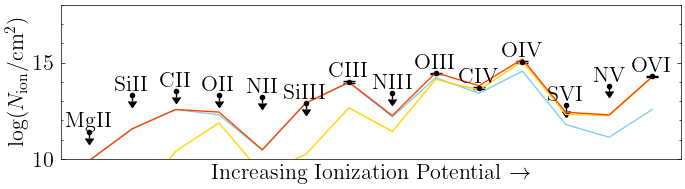

In [14]:
fig, ax = plt.subplots(1, figsize=(8,2))

plot_column_densities_obs(logN_dict, fig, ax)

ax.plot(np.arange(len(logN_dict)), logN_test_p1, color='skyblue')
ax.plot(np.arange(len(logN_dict)), logN_test_p2, color='gold')
ax.plot(np.arange(len(logN_dict)), np.log10(10**logN_test_p1+10**logN_test_p2), color='orangered')

#ax.set_ylim(13.5,15.5)

In [15]:
pos = np.array([log_metals_test_p1,log_hdens_test_p1,logT_test_p1,C_O_test_p1,N_O_test_p1, 
                log_metals_test_p2,log_hdens_test_p2,logT_test_p2,C_O_test_p2,N_O_test_p2,logN_HI_test_p2]) + 1e-4 * np.random.randn(200, 11)
nwalkers, ndim = pos.shape

In [16]:
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_3, args=(logN_dict,logX_dict_TDP_interp)
)

In [17]:
#sampler.run_mcmc(pos, 500, progress=True);

In [18]:
#flat_samples_3 = pd.DataFrame(sampler.get_chain(discard=100, flat=True), 
#                                columns=['log_metals_p1','log_hdens_p1','logT_p1','C_O_p1','N_O_p1',
#                                         'log_metals_p2','log_hdens_p2','logT_p2','C_O_p2','N_O_p2','logN_HI_p2'])
#flat_samples_3.to_csv(savedir+'TDP_3.csv', index=False)

flat_samples_3 = pd.read_csv(savedir+'TDP_3.csv')

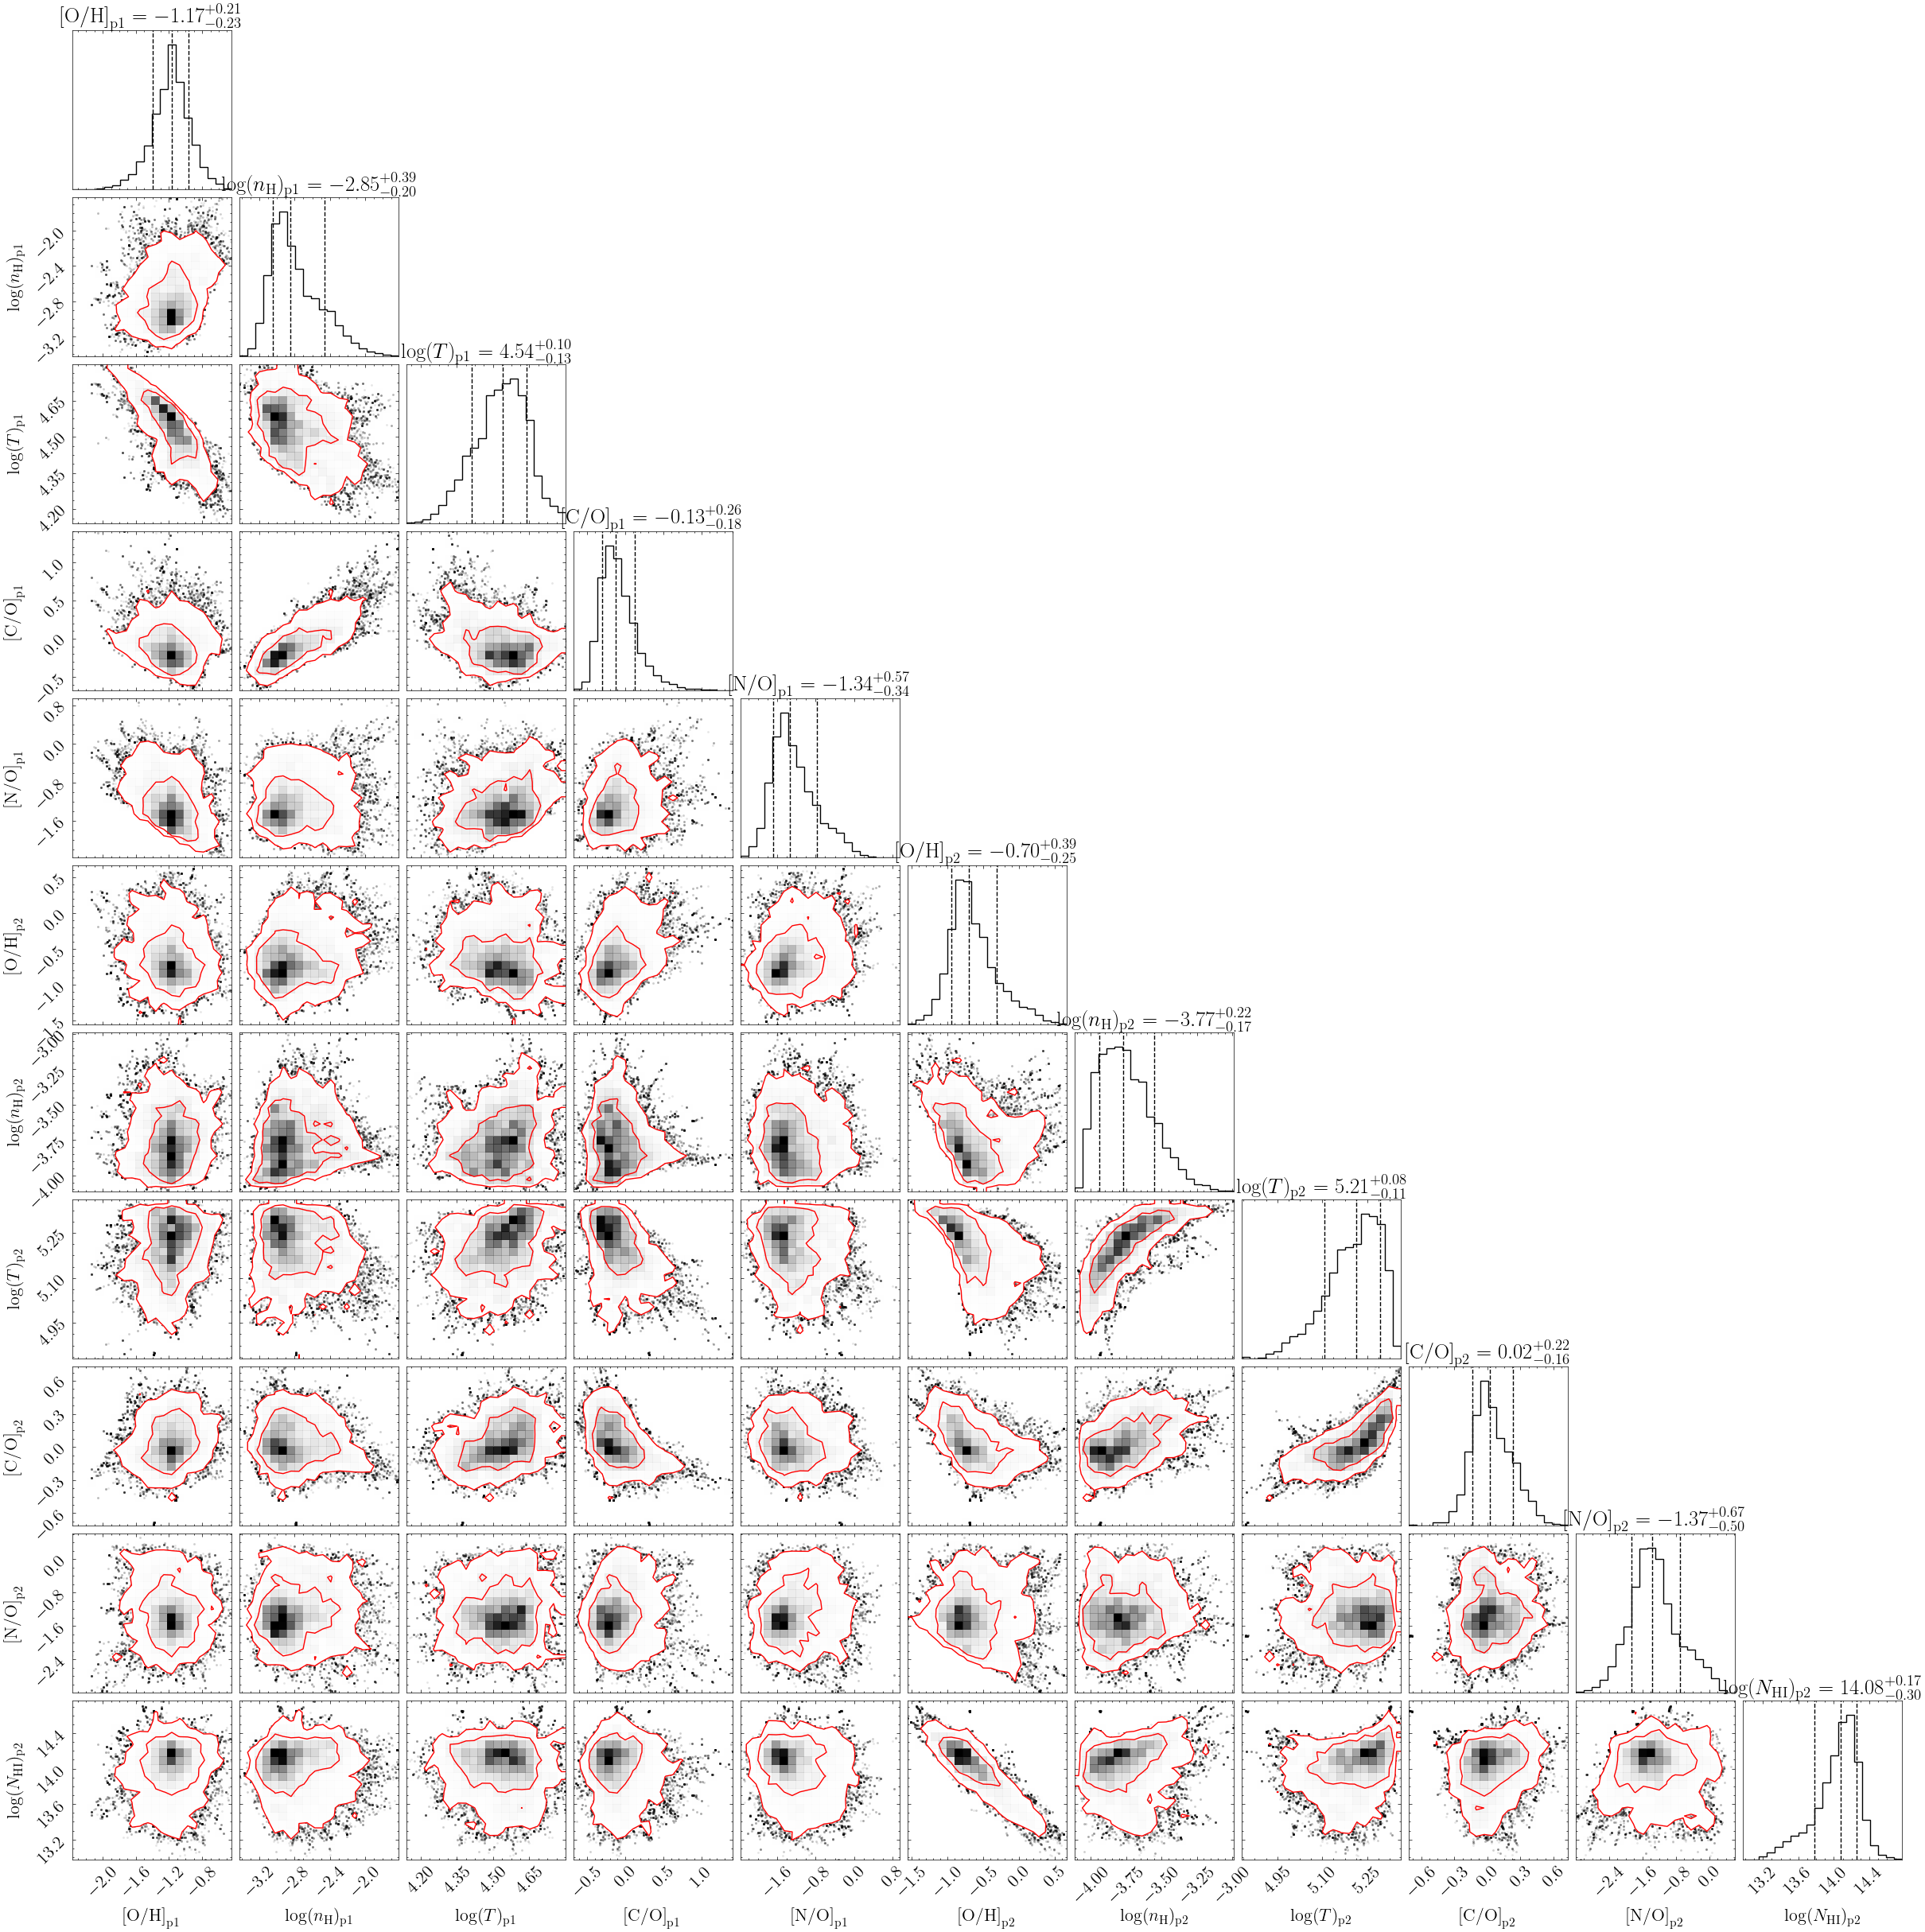

In [19]:
fig = corner.corner(
    flat_samples_3, quantiles = [0.16, 0.5, 0.84], show_titles=True, 
    labels=[r'$\mathrm{[O/H]}_\mathrm{p1}$',r'$\log(n_\mathrm{H})_\mathrm{p1}$',r'$\log(T)_\mathrm{p1}$',r'$\mathrm{[C/O]}_\mathrm{p1}$',r'$\mathrm{[N/O]}_\mathrm{p1}$',
            r'$\mathrm{[O/H]}_\mathrm{p2}$',r'$\log(n_\mathrm{H})_\mathrm{p2}$',r'$\log(T)_\mathrm{p2}$',r'$\mathrm{[C/O]}_\mathrm{p2}$',r'$\mathrm{[N/O]}_\mathrm{p2}$',
            r'$\log(N_\mathrm{HI})_\mathrm{p2}$'], 
    plot_density=True, levels=[0.68, 0.95], contour_kwargs={'colors':'red'}
);

(array([24530., 22912., 15516.,  8382.,  5030.,  2521.,   869.,   156.,
           57.,    27.]),
 array([-2.99956064, -2.70797995, -2.41639925, -2.12481856, -1.83323786,
        -1.54165717, -1.25007648, -0.95849578, -0.66691509, -0.37533439,
        -0.0837537 ]),
 <BarContainer object of 10 artists>)

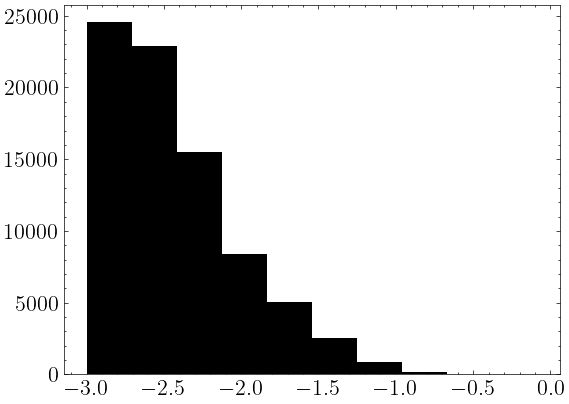

In [20]:
plt.hist(flat_samples_3['log_metals_p1']+flat_samples_3['N_O_p1'])

(array([12016., 18276., 18777., 11965.,  8221.,  5447.,  2933.,  1427.,
          727.,   211.]),
 array([-2.99992314, -2.62924891, -2.25857468, -1.88790044, -1.51722621,
        -1.14655198, -0.77587774, -0.40520351, -0.03452928,  0.33614496,
         0.70681919]),
 <BarContainer object of 10 artists>)

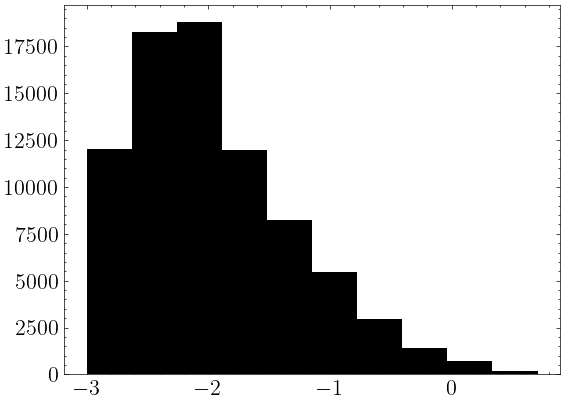

In [21]:
plt.hist(flat_samples_3['log_metals_p2']+flat_samples_3['N_O_p2'])

In [22]:
np.percentile(flat_samples_3['N_O_p1'], 100*cdf_3sig), np.percentile(flat_samples_3['N_O_p2'], 100*cdf_3sig)

(0.3219878501161359, 0.2717161529913456)

Make a plot

In [23]:
logN_dict = {#'HI':'15.52, -0.05, +0.05',
            'CII':'<13.5',
            'CIII':'13.98, -0.05, +0.05',
            'CIV':'13.68, -0.05, +0.05',
            'NII':'<13.2',
            'NIII':'<13.4',
            'NV':'<13.8',
            'OII':'<13.3',
            'OIII':'14.43, -0.02, +0.02',
            'OIV':'15.01, -0.05, +0.07',
            'OVI':'14.29, -0.03, +0.03',
            'NeVIII':'<13.4',
            'MgII':'<11.4',
            #'AlIII':'<12.5',
            'SiII':'<13.3',
            'SiIII':'<12.9',
            'SVI':'<12.8',}
            #'FeII':'<11.8'}

In [24]:
b_dict =  {'HI': '36, -1, +2',
        'CIII': '31, -2, +2',
        'CIV': '33, -4, +5',
        'OIII': '34, -2, +2',
        'OIV': '30, -2, +2',
        'OVI': '32, -3, +3'}

In [25]:
p3_grid = np.array(flat_samples_3)

yb_med_p1 = np.zeros(len(logN_dict))
yb_lo_p1 = np.zeros(len(logN_dict))
yb_hi_p1 = np.zeros(len(logN_dict))

yb_med_p2 = np.zeros(len(logN_dict))
yb_lo_p2 = np.zeros(len(logN_dict))
yb_hi_p2 = np.zeros(len(logN_dict))

yb_med = np.zeros(len(logN_dict))
yb_lo = np.zeros(len(logN_dict))
yb_hi = np.zeros(len(logN_dict))

ctr = 0

for i in range(len(ion_species_dict)):
    
    ion = list(ion_species_dict.keys())[i]
    
    if ion in list(logN_dict.keys()):
        elem = ion_species_dict[ion].split('+')[0]

        y_samples_p1 = predict_col_dens_TDP(ion, p3_grid[:,0], p3_grid[:,1], p3_grid[:,2], 15.52, logX_dict_TDP_interp)
        y_samples_p2 = predict_col_dens_TDP(ion, p3_grid[:,5], p3_grid[:,6], p3_grid[:,7], p3_grid[:,10], logX_dict_TDP_interp)
        
        if elem == 'C':
            y_samples_p1 += p3_grid[:,3]
            y_samples_p2 += p3_grid[:,8]
        if elem == 'N':
            y_samples_p1 += p3_grid[:,4]
            y_samples_p2 += p3_grid[:,9]
           
        y_samples = np.log10(10**y_samples_p1 + 10**y_samples_p2) 
        
        yb_med_p1[ctr] = np.median(y_samples_p1)
        yb_lo_p1[ctr] = np.percentile(y_samples_p1, 16)
        yb_hi_p1[ctr] = np.percentile(y_samples_p1, 84)
        
        yb_med_p2[ctr] = np.median(y_samples_p2)
        yb_lo_p2[ctr] = np.percentile(y_samples_p2, 16)
        yb_hi_p2[ctr] = np.percentile(y_samples_p2, 84)
        
        yb_med[ctr] = np.median(y_samples)
        yb_lo[ctr] = np.percentile(y_samples, 16)
        yb_hi[ctr] = np.percentile(y_samples, 84)
        
        ctr += 1

In [26]:
import matplotlib.lines as mlines

In [27]:
z_sys = 0.67545705

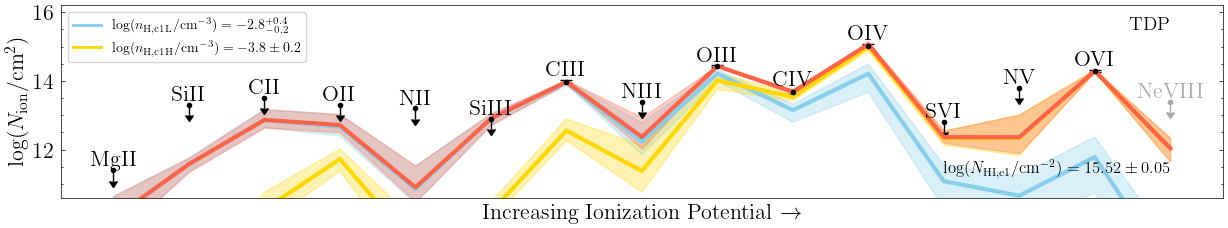

In [28]:
fig, ax = plt.subplots(1, figsize=(15,2.5))

plot_column_densities_obs(logN_dict, fig, ax,
                          gray_out = ['NeVIII'])

ax.plot(np.arange(len(logN_dict)), yb_med_p1, lw=3, color='skyblue')
ax.fill_between(np.arange(len(logN_dict)), yb_lo_p1, yb_hi_p1, color='skyblue', alpha=.3)

ax.plot(np.arange(len(logN_dict)), yb_med_p2, lw=3, color='gold')
ax.fill_between(np.arange(len(logN_dict)), yb_lo_p2, yb_hi_p2, color='gold', alpha=.3)

ax.plot(np.arange(len(logN_dict)), yb_med, lw=3, color='tomato')
ax.fill_between(np.arange(len(logN_dict)), yb_lo, yb_hi, color='tomato', alpha=.3)

ax.set_ylim(10.6,16.2)

ax.text(len(logN_dict)-1, 11.3, r'$\log(N_\mathrm{HI, c1}/\mathrm{cm}^{-2}) = 15.52 \pm 0.05$', fontsize=12,
            horizontalalignment='right')

ax.text(len(logN_dict)-1, 15.5, 'TDP', fontsize=14,
            horizontalalignment='right')

handles = []

handles.append(mlines.Line2D([], [], lw=2,
                             color='skyblue', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H, c1L}/\mathrm{cm}^{-3}) = -2.8_{-0.2}^{+0.4}$'))

handles.append(mlines.Line2D([], [], lw=2,
                             color='gold', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H, c1H}/\mathrm{cm}^{-3}) = -3.8 \pm 0.2$'))

ax.legend(handles=handles, loc='upper left', fontsize=10)

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_TDP.pdf'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)
plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_TDP.png'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)

In [30]:
yb_med_p2[-7], yb_med_p2[-7]-yb_lo_p2[-7], yb_hi_p2[-7]-yb_med_p2[-7]

(14.016213152885882, 0.2615457422791376, 0.20826247810608933)

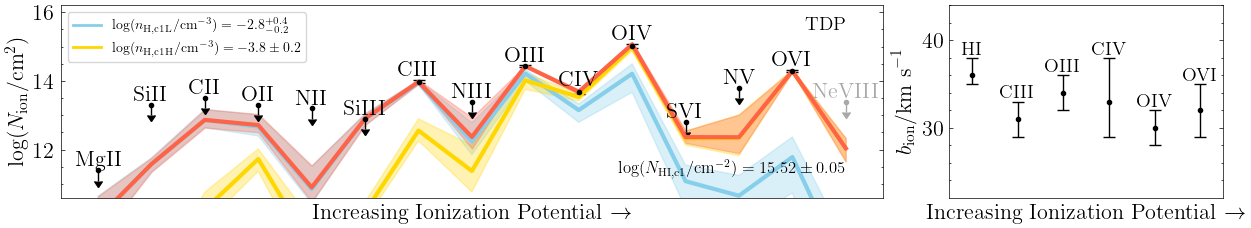

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15,2.5), gridspec_kw={'width_ratios': [3, 1]})

plot_column_densities_obs(logN_dict, fig, axes[0],
                          gray_out = ['NeVIII'])

axes[0].plot(np.arange(len(logN_dict)), yb_med_p1, lw=3, color='skyblue')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo_p1, yb_hi_p1, color='skyblue', alpha=.3)

axes[0].plot(np.arange(len(logN_dict)), yb_med_p2, lw=3, color='gold')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo_p2, yb_hi_p2, color='gold', alpha=.3)

axes[0].plot(np.arange(len(logN_dict)), yb_med, lw=3, color='tomato')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo, yb_hi, color='tomato', alpha=.3)

axes[0].set_ylim(10.6,16.2)

axes[0].text(len(logN_dict)-1, 11.3, r'$\log(N_\mathrm{HI, c1}/\mathrm{cm}^{-2}) = 15.52 \pm 0.05$', fontsize=12,
            horizontalalignment='right')

axes[0].text(len(logN_dict)-1, 15.5, 'TDP', fontsize=14,
            horizontalalignment='right')

handles = []

handles.append(mlines.Line2D([], [], lw=2,
                             color='skyblue', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H, c1L}/\mathrm{cm}^{-3}) = -2.8_{-0.2}^{+0.4}$'))

handles.append(mlines.Line2D([], [], lw=2,
                             color='gold', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H, c1H}/\mathrm{cm}^{-3}) = -3.8 \pm 0.2$'))

axes[0].legend(handles=handles, loc='upper left', fontsize=10)

plot_linewidth_obs(b_dict, fig, axes[1], fs=14)
axes[1].set_xlim(-0.5, 5.5)
axes[1].set_ylim(22,44)

plt.subplots_adjust(wspace=0.12, hspace=0)  

#plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_TDP.pdf'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)
#plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_TDP.png'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)

In [29]:
logl_p1 = get_logl_TDP(p3_grid[:,0], p3_grid[:,1], p3_grid[:,2], 15.52, logX_dict_TDP_interp)
logl_p2 = get_logl_TDP(p3_grid[:,5], p3_grid[:,6], p3_grid[:,7], p3_grid[:,10], logX_dict_TDP_interp)

(array([  231.,   547.,  1745.,  4660.,  8822., 13808., 21796., 22162.,
         5905.,   324.]),
 array([-2.30335456, -1.88884672, -1.47433888, -1.05983104, -0.6453232 ,
        -0.23081537,  0.18369247,  0.59820031,  1.01270815,  1.42721599,
         1.84172383]),
 <BarContainer object of 10 artists>)

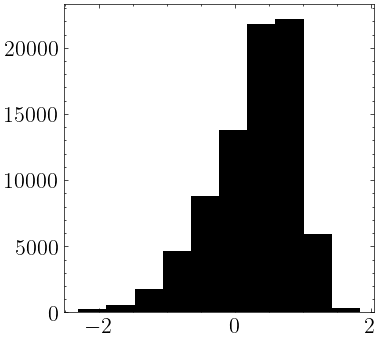

In [30]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.hist(logl_p1)

In [31]:
get_quantiles(logl_p1)

0.42 -0.79 0.44


In [35]:
np.percentile(logl_p1, 100*cdf_3sig)

1.5270128536081167

(array([  135.,   389.,  1001.,  1558.,  2406.,  3449.,  6560., 11578.,
        20260., 32664.]),
 array([0.26839599, 0.44154258, 0.61468918, 0.78783578, 0.96098237,
        1.13412897, 1.30727556, 1.48042216, 1.65356875, 1.82671535,
        1.99986194]),
 <BarContainer object of 10 artists>)

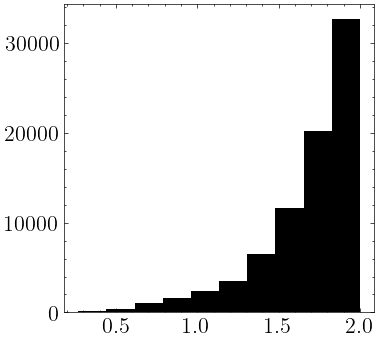

In [36]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.hist(logl_p2)

In [39]:
np.percentile(logl_p2, 100*cdf_3sig)

1.999297409966438

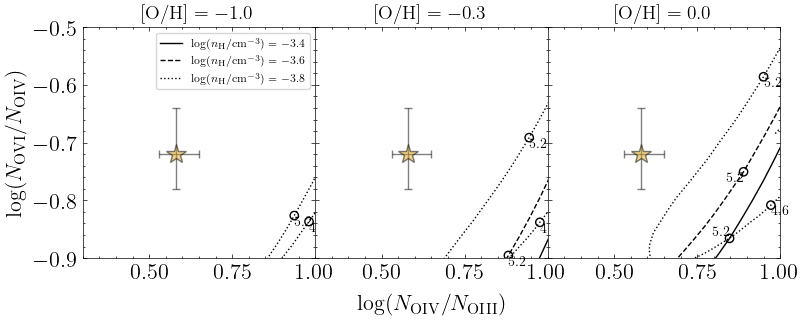

In [13]:
fig, axes = plt.subplots(1,3,figsize=(3*3,3), sharex=True, sharey=True)

# Plot measurements

scat_logN_ratio(axes[0], 'OIV/OIII', 'OVI/OIV', logN_ratio_dict)
axes[0].set_title(r'$\mathrm{[O/H]}=-1.0$', fontsize=14)

scat_logN_ratio(axes[1], 'OIV/OIII', 'OVI/OIV', logN_ratio_dict)
axes[1].set_title(r'$\mathrm{[O/H]}=-0.3$', fontsize=14)

scat_logN_ratio(axes[2], 'OIV/OIII', 'OVI/OIV', logN_ratio_dict)
axes[2].set_title(r'$\mathrm{[O/H]}=0.0$', fontsize=14)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$\log(N_\mathrm{OIV}/N_\mathrm{OIII})$', labelpad=25)
ax_label.set_ylabel(r'$\log(N_\mathrm{OVI}/N_\mathrm{OIV})$', labelpad=40)

plt.subplots_adjust(wspace=0, hspace=0.0)

# Plot tracks
# metals = -1.0

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      -1.0, -3.4, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      -1.0, -3.6, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      -1.0, -3.8, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      ':', 'left', 'top')

axes[0].legend(fontsize=8)

# metals = -0.3

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      -0.3, -3.4, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      -0.3, -3.6, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      -0.3, -3.8, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      ':', 'left', 'top')

# metals = 0.0

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.0, -3.4, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.0, -3.6, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '--', 'right', 'top')

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.0, -3.8, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      ':', 'left', 'top')

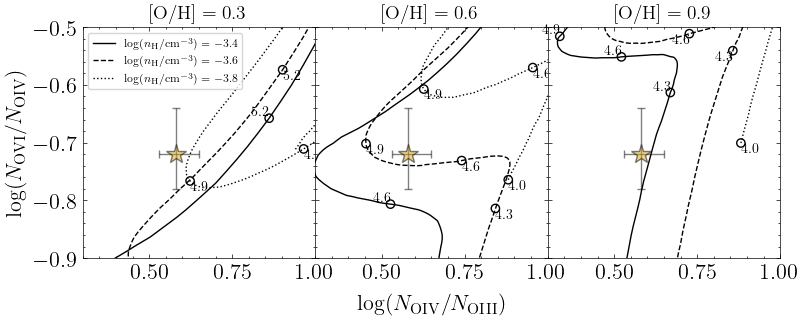

In [14]:
fig, axes = plt.subplots(1,3,figsize=(3*3,3), sharex=True, sharey=True)

# Plot measurements

scat_logN_ratio(axes[0], 'OIV/OIII', 'OVI/OIV', logN_ratio_dict)
axes[0].set_title(r'$\mathrm{[O/H]}=0.3$', fontsize=14)

scat_logN_ratio(axes[1], 'OIV/OIII', 'OVI/OIV', logN_ratio_dict)
axes[1].set_title(r'$\mathrm{[O/H]}=0.6$', fontsize=14)

scat_logN_ratio(axes[2], 'OIV/OIII', 'OVI/OIV', logN_ratio_dict)
axes[2].set_title(r'$\mathrm{[O/H]}=0.9$', fontsize=14)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$\log(N_\mathrm{OIV}/N_\mathrm{OIII})$', labelpad=25)
ax_label.set_ylabel(r'$\log(N_\mathrm{OVI}/N_\mathrm{OIV})$', labelpad=40)

plt.subplots_adjust(wspace=0, hspace=0.0)

# Plot tracks
# metals = -1.0

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.3, -3.4, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.3, -3.6, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.3, -3.8, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      ':', 'left', 'top')

axes[0].legend(fontsize=8)

# metals = -0.3

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.6, -3.4, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.6, -3.6, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.6, -3.8, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      ':', 'left', 'top')

# metals = 0.0

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.9, -3.4, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.9, -3.6, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      '--', 'right', 'top')

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OVI', logX_dict_TDP_interp,
                      0.9, -3.8, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      0.3, 1.0, -0.9, -0.5,
                      ':', 'left', 'top')